![igvflogo](images/igvf-winter-logo.png)
# How to get access to single-cell AnnData (h5ad) files interrogate and display the calculated UMAPS


In [1]:
import anndata as ad
import json
import pandas as pd
import requests
import scanpy as sc
from IPython.display import display
from scipy import sparse
from urllib.parse import quote

import boto3
import io
from urllib.parse import urlparse
#from cellxgene_mods import *

# Loading the AnnData object
### *The matrix `IGVFFI5345SNRS.h5ad` is from a mouse cerebral cortext PARSE-split-seq scRNA dataset: [IGVFDS4883TFKC](https://data.igvf.org/analysis-sets/IGVFDS4883TFKC/)*
We will start by fetching the File metadata and the s3_uri

In [2]:
file_metadata = requests.get("https://api.data.igvf.org/matrix-files/IGVFFI5345SNRS").json()
uri = file_metadata['s3_uri']
uri

's3://igvf-files/2024/09/03/60005c1e-96ac-4e2a-ae69-021e93a72106/IGVFFI5345SNRS.h5ad'

In [3]:
parsed = urlparse(uri)

bucket_name = parsed.netloc
object_key = parsed.path.lstrip("/")

print("Bucket:", bucket_name)
print("Key:", object_key)

Bucket: igvf-files
Key: 2024/09/03/60005c1e-96ac-4e2a-ae69-021e93a72106/IGVFFI5345SNRS.h5ad


### From this point on you will need to be authenticated in AWS 

In [4]:

# Initialize S3 client
s3_client = boto3.client('s3')

# Get the object from S3 - requires creds
response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the content of the object into a BytesIO stream
data_stream = io.BytesIO(response['Body'].read())


**Load the AnnData object**  (this might take a minute)

In [5]:
adata = sc.read_h5ad(data_stream)
adata

AnnData object with n_obs × n_vars = 98443 × 56953
    obs: 'lab_sample_id', 'sample', 'plate', 'subpool', 'SampleType', 'Tissue', 'Sex', 'Age', 'Genotype', 'leiden', 'leiden_R', 'subpool_type', 'general_celltype', 'general_CL_ID', 'celltype', 'CL_ID', 'subtype', 'Protocol', 'Chemistry', 'bc', 'bc1_sequence', 'bc2_sequence', 'bc3_sequence', 'bc1_well', 'bc2_well', 'bc3_well', 'Row', 'Column', 'well_type', 'Mouse_Tissue_ID', 'DOB', 'Age_days', 'Body_weight_g', 'Estrus_cycle', 'Dissection_date', 'Dissection_time', 'ZT', 'Dissector', 'Tissue_weight_mg', 'Total_extracted_million', 'Notes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Genotype_colors', 'celltype_col

# The "obsm" object represents the Multi-dimensional annotation of observations (usually cell type annotations)
**Confirm at least one set of embeddings is present**

In [6]:
adata.obsm

AxisArrays with keys: X_pca, X_pca_harmony, X_umap, gene_expression_encoding

** Let's View the umap **

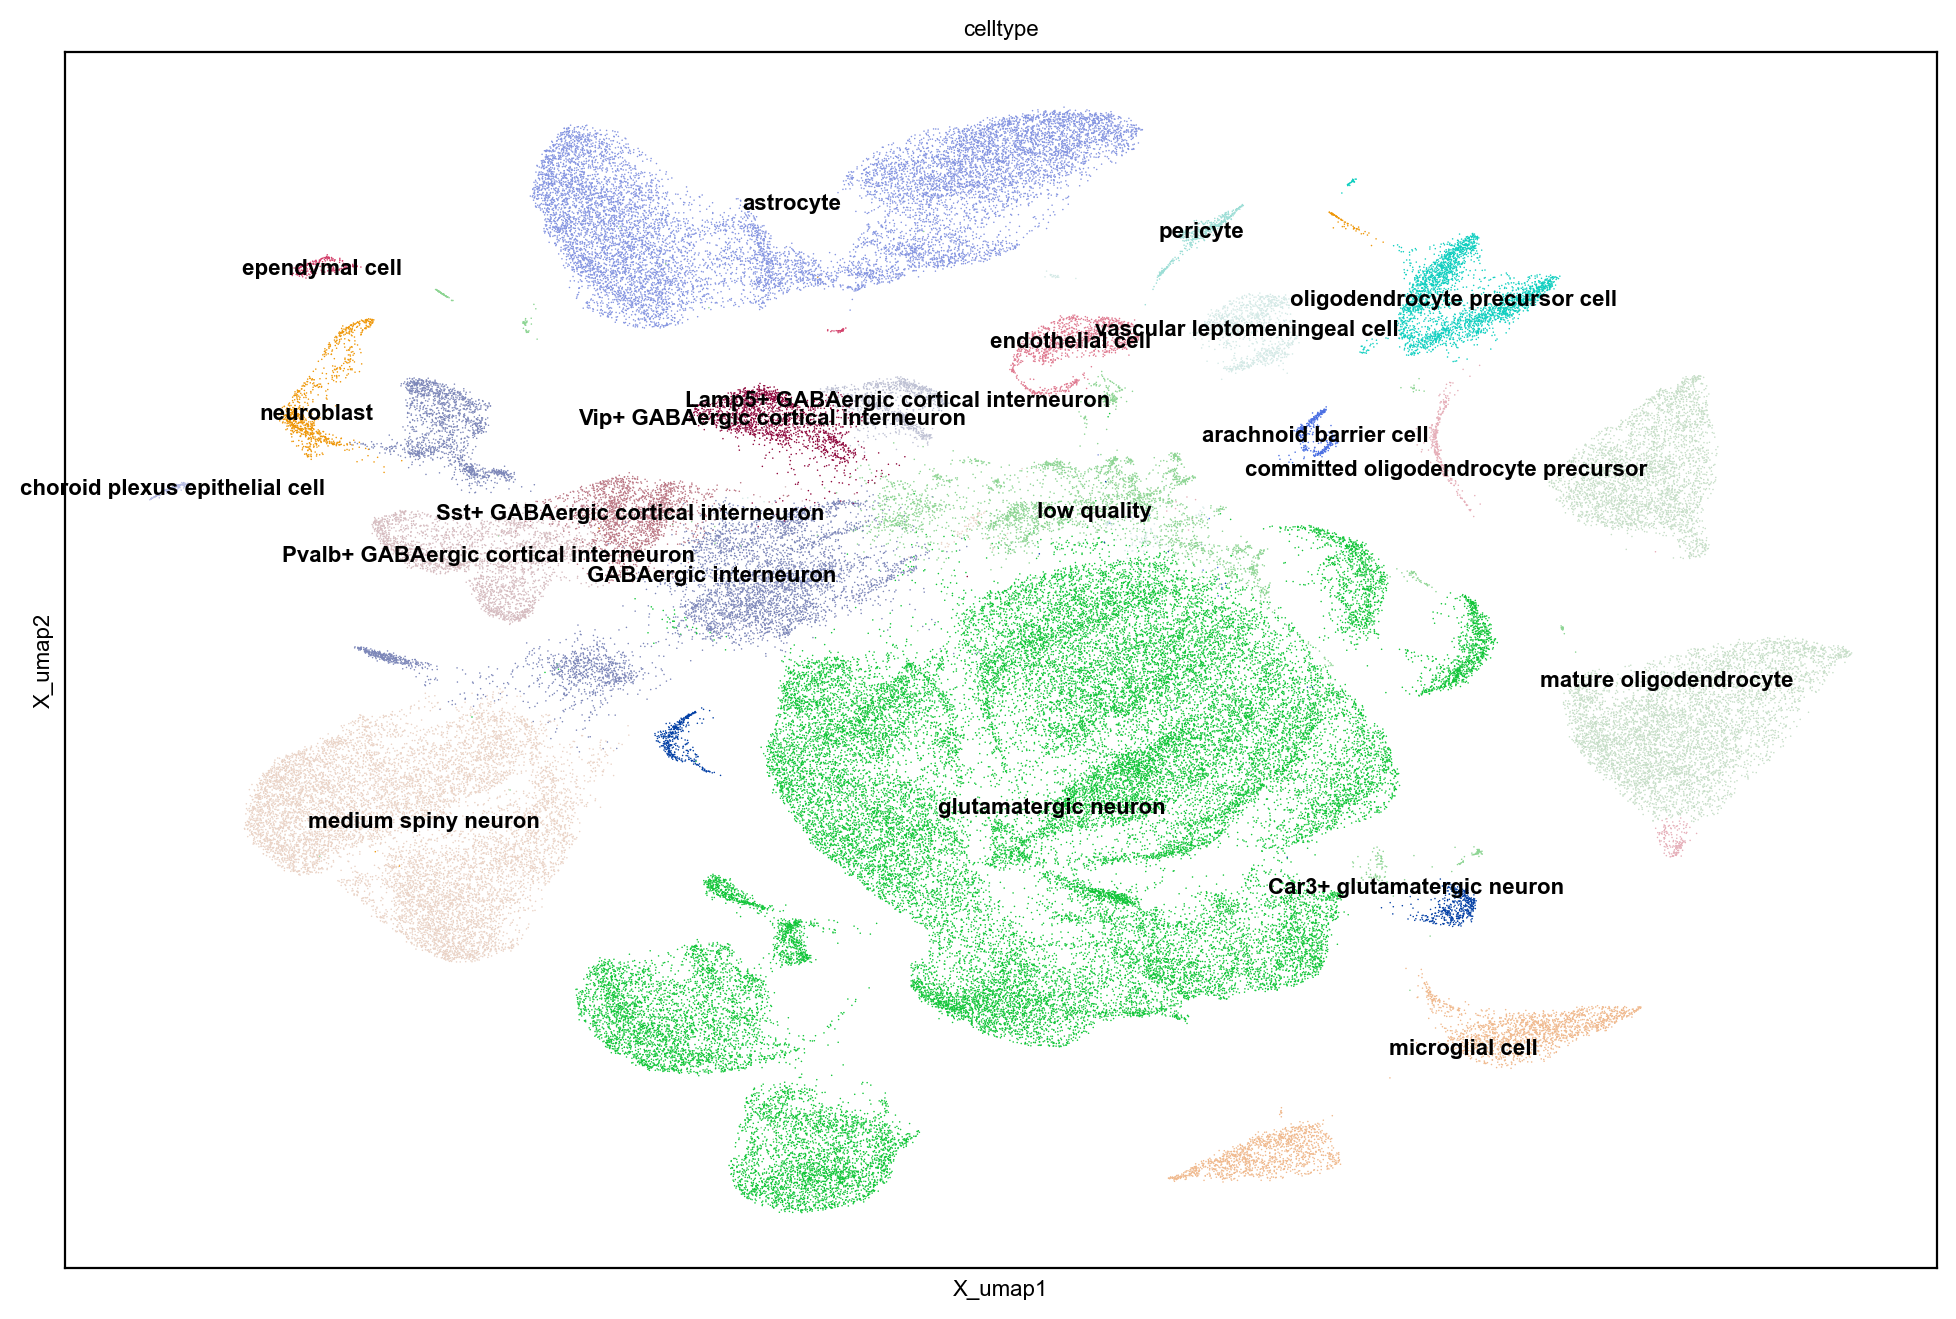

In [7]:

e = 'X_umap'
cellpop_field = 'celltype' # this can vary from example to example
sc.set_figure_params(dpi=100, fontsize=8, figsize=(12.0,8.0))
sc.pl.embedding(adata, basis=e, color=cellpop_field, legend_loc='on data')


**The uns is the unstructured annotations; let's take a look**

In [8]:
adata.uns

{'Genotype_colors': array(['#1f77b4', '#ff7f0e'], dtype=object),
 'celltype_colors': array(['#023fa5', '#7d87b9', '#bec1d4', '#d6bcc0', '#bb7784', '#8e063b',
        '#4a6fe3', '#8595e1', '#b5bbe3', '#e6afb9', '#e07b91', '#d33f6a',
        '#11c638', '#8dd593', '#c6dec7', '#ead3c6', '#f0b98d', '#ef9708',
        '#0fcfc0', '#9cded6', '#d5eae7'], dtype=object),
 'dendrogram_leiden_R': {'categories_idx_ordered': array([42, 21, 24,  7, 11, 27, 41, 39,  6,  8, 20,  0, 12, 50, 28, 44, 38,
         15, 16,  4, 23, 29, 36, 32, 34,  1, 17, 18, 51, 26, 31, 37, 40, 19,
         25, 33, 48, 47, 35, 52, 53, 54,  9, 13, 43,  2,  5, 14, 55, 22, 45,
         46, 49, 10,  3, 30]),
  'categories_ordered': array(['41', '20', '23', '7', '11', '26', '40', '38', '6', '8', '19', '0',
         '12', '49', '27', '43', '37', '15_0', '15_1', '4', '22', '28',
         '35', '31', '33', '1', '16', '17', '50', '25', '30', '36', '39',
         '18', '24', '32', '47', '46', '34', '51', '52', '53', '9', '13',
       

# Let's look at 'obs' the one dimensional annotatations

In [9]:
adata.obs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98443 entries, A4_E3_D3_Subpool_1_igvf_b01 to C8_F6_E2_Subpool_4_igvf_b01
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   lab_sample_id            98443 non-null  category
 1   sample                   98443 non-null  category
 2   plate                    98443 non-null  category
 3   subpool                  98443 non-null  category
 4   SampleType               98443 non-null  category
 5   Tissue                   98443 non-null  category
 6   Sex                      98443 non-null  category
 7   Age                      98443 non-null  category
 8   Genotype                 98443 non-null  category
 9   leiden                   98443 non-null  category
 10  leiden_R                 98443 non-null  category
 11  subpool_type             98443 non-null  category
 12  general_celltype         98443 non-null  category
 13  general_CL_ID     

In [10]:
adata.obs

,lab_sample_id,sample,plate,subpool,SampleType,Tissue,Sex,Age,Genotype,leiden,...,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,background_fraction,cell_probability,cell_size,droplet_efficiency
cellID,,,,,,,,,,,,,,,,,,,,,
A4_E3_D3_Subpool_1_igvf_b01,117_B6J_10M_21,IGVFSM2279TQMZ,igvf_b01,Subpool_1,Nuclei,LeftCortex,Male,PNM_02,B6J,21,...,10365,103378.0,678.0,0.655846,0.208333,False,0.000522,0.999955,86148.484375,1.201976
D3_C8_A7_Subpool_1_igvf_b01,108_CASTJ_10F_21,IGVFSM0447EABS,igvf_b01,Subpool_1,Nuclei,LeftCortex,Female,PNM_02,CASTJ,21,...,9523,84155.0,19.0,0.022577,0.112840,False,0.000570,0.999955,35082.406250,2.449285
D5_C3_C4_Subpool_1_igvf_b01,108_CASTJ_10F_21,IGVFSM0447EABS,igvf_b01,Subpool_1,Nuclei,LeftCortex,Female,PNM_02,CASTJ,21,...,8350,68263.0,8.0,0.011719,0.102362,False,0.000659,0.999955,28506.757812,2.459552
D3_B11_H2_Subpool_1_igvf_b01,108_CASTJ_10F_21,IGVFSM0447EABS,igvf_b01,Subpool_1,Nuclei,LeftCortex,Female,PNM_02,CASTJ,21,...,8690,65097.0,15.0,0.023043,0.136364,False,0.000753,0.999955,27197.914062,2.461967
A1_C11_G8_Subpool_1_igvf_b01,118_B6J_10F_21,IGVFSM7772DGMA,igvf_b01,Subpool_1,Nuclei,LeftCortex,Female,PNM_02,B6J,21,...,8017,63563.0,5.0,0.007866,0.141243,False,0.000897,0.999955,26884.816406,2.432987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C8_D8_D10_Subpool_4_igvf_b01,119_B6J_10M_21,IGVFSM5782OIYL,igvf_b01,Subpool_4,Nuclei,LeftCortex,Male,PNM_02,B6J,40,...,542,727.0,3.0,0.412655,0.031484,False,0.291609,0.617632,2048.537354,0.599232
C8_E8_H1_Subpool_4_igvf_b01,119_B6J_10M_21,IGVFSM5782OIYL,igvf_b01,Subpool_4,Nuclei,LeftCortex,Male,PNM_02,B6J,40,...,513,687.0,3.0,0.436681,0.023136,False,0.267831,0.644954,1981.447266,0.599988
C7_B7_G9_Subpool_4_igvf_b01,120_B6J_10F_21,IGVFSM7094ZNGP,igvf_b01,Subpool_4,Nuclei,LeftCortex,Female,PNM_02,B6J,40,...,464,668.0,2.0,0.299401,0.025641,False,0.155688,0.540475,1934.854980,0.607773


# Finally we'll take a look at var, the one-dimensional data frame of features (typically genes or accessible-peaks)


In [11]:
adata.var

,gene_id,gene_name,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
gene_name,,,,,,,,,,,
4933401J01Rik,ENSMUSG00000102693.2,4933401J01Rik,False,2,0.000014,99.998626,2.0,False,2.215573e-05,0.248589,-1.138509
Gm26206,ENSMUSG00000064842.3,Gm26206,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,0.000000
Xkr4,ENSMUSG00000051951.6,Xkr4,False,80003,6.455134,45.023433,939364.0,False,2.286713e+00,2.389809,-0.382769
Gm18956,ENSMUSG00000102851.2,Gm18956,False,31,0.000213,99.978697,31.0,False,3.257932e-04,0.546551,-0.777427
Gm37180,ENSMUSG00000103377.2,Gm37180,False,12856,0.109578,91.165597,15946.0,False,1.397796e-01,0.484034,-0.853188
...,...,...,...,...,...,...,...,...,...,...,...
Gm21860,ENSMUSG00000095366.3,Gm21860,False,887,0.006288,99.390470,915.0,False,1.599959e-02,1.472414,0.344569
Mid1-ps1,ENSMUSG00000095134.3,Mid1-ps1,False,257,0.001814,99.823394,264.0,False,3.769026e-03,1.227173,0.047376
Gm47283,ENSMUSG00000096768.9,Gm47283,False,73571,1.695551,49.443383,246740.0,False,1.469655e+00,1.855221,-0.331601


 ### *[IGVFDS4883TFKC](https://data.igvf.org/analysis-sets/IGVFDS4883TFKC/) is a human B-Cell 10X Multiomics dataset*
 `IGVFFI9438KOCK.h5ad` is the snRNA-seq matrix and 
 `IGVFFI3541FUQE.h5ad` is the snATAC-seq matrix

We will condense some steps

In [12]:
file_metadata = requests.get("https://api.data.igvf.org/matrix-files/IGVFFI9438KOCK/").json()
uri = file_metadata['s3_uri']
parsed = urlparse(uri)

bucket_name = parsed.netloc
object_key = parsed.path.lstrip("/")

# Get the object from S3 - requires creds
response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the content of the object into a BytesIO stream
data_stream = io.BytesIO(response['Body'].read())

adata = sc.read_h5ad(data_stream)
adata

AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden', 'score_G1S', 'score_G2M', 'score_myc_up', 'score_GC', 'score_PB', 'score_MBC_1', 'score_MBC_2', 'score_preGC', 'score_LZ_GC', 'score_DZ_GC', 'DNA_damage', 'LZ_vs_DZ_down', 'LZ_vs_DZ_up', 'Ag_presentation', 'BCR_signaling', 'leiden_filtered_cells', 'cell_type_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neig

# The "obsm" object represents the Multi-dimensional annotation of observations (usually cell type annotations)
**Confirm at least one set of embeddings is present**

In [13]:
adata.obsm

AxisArrays with keys: X_joint_umap_features, X_topic_compositions, X_umap, X_umap_features

** Let's View the umap **

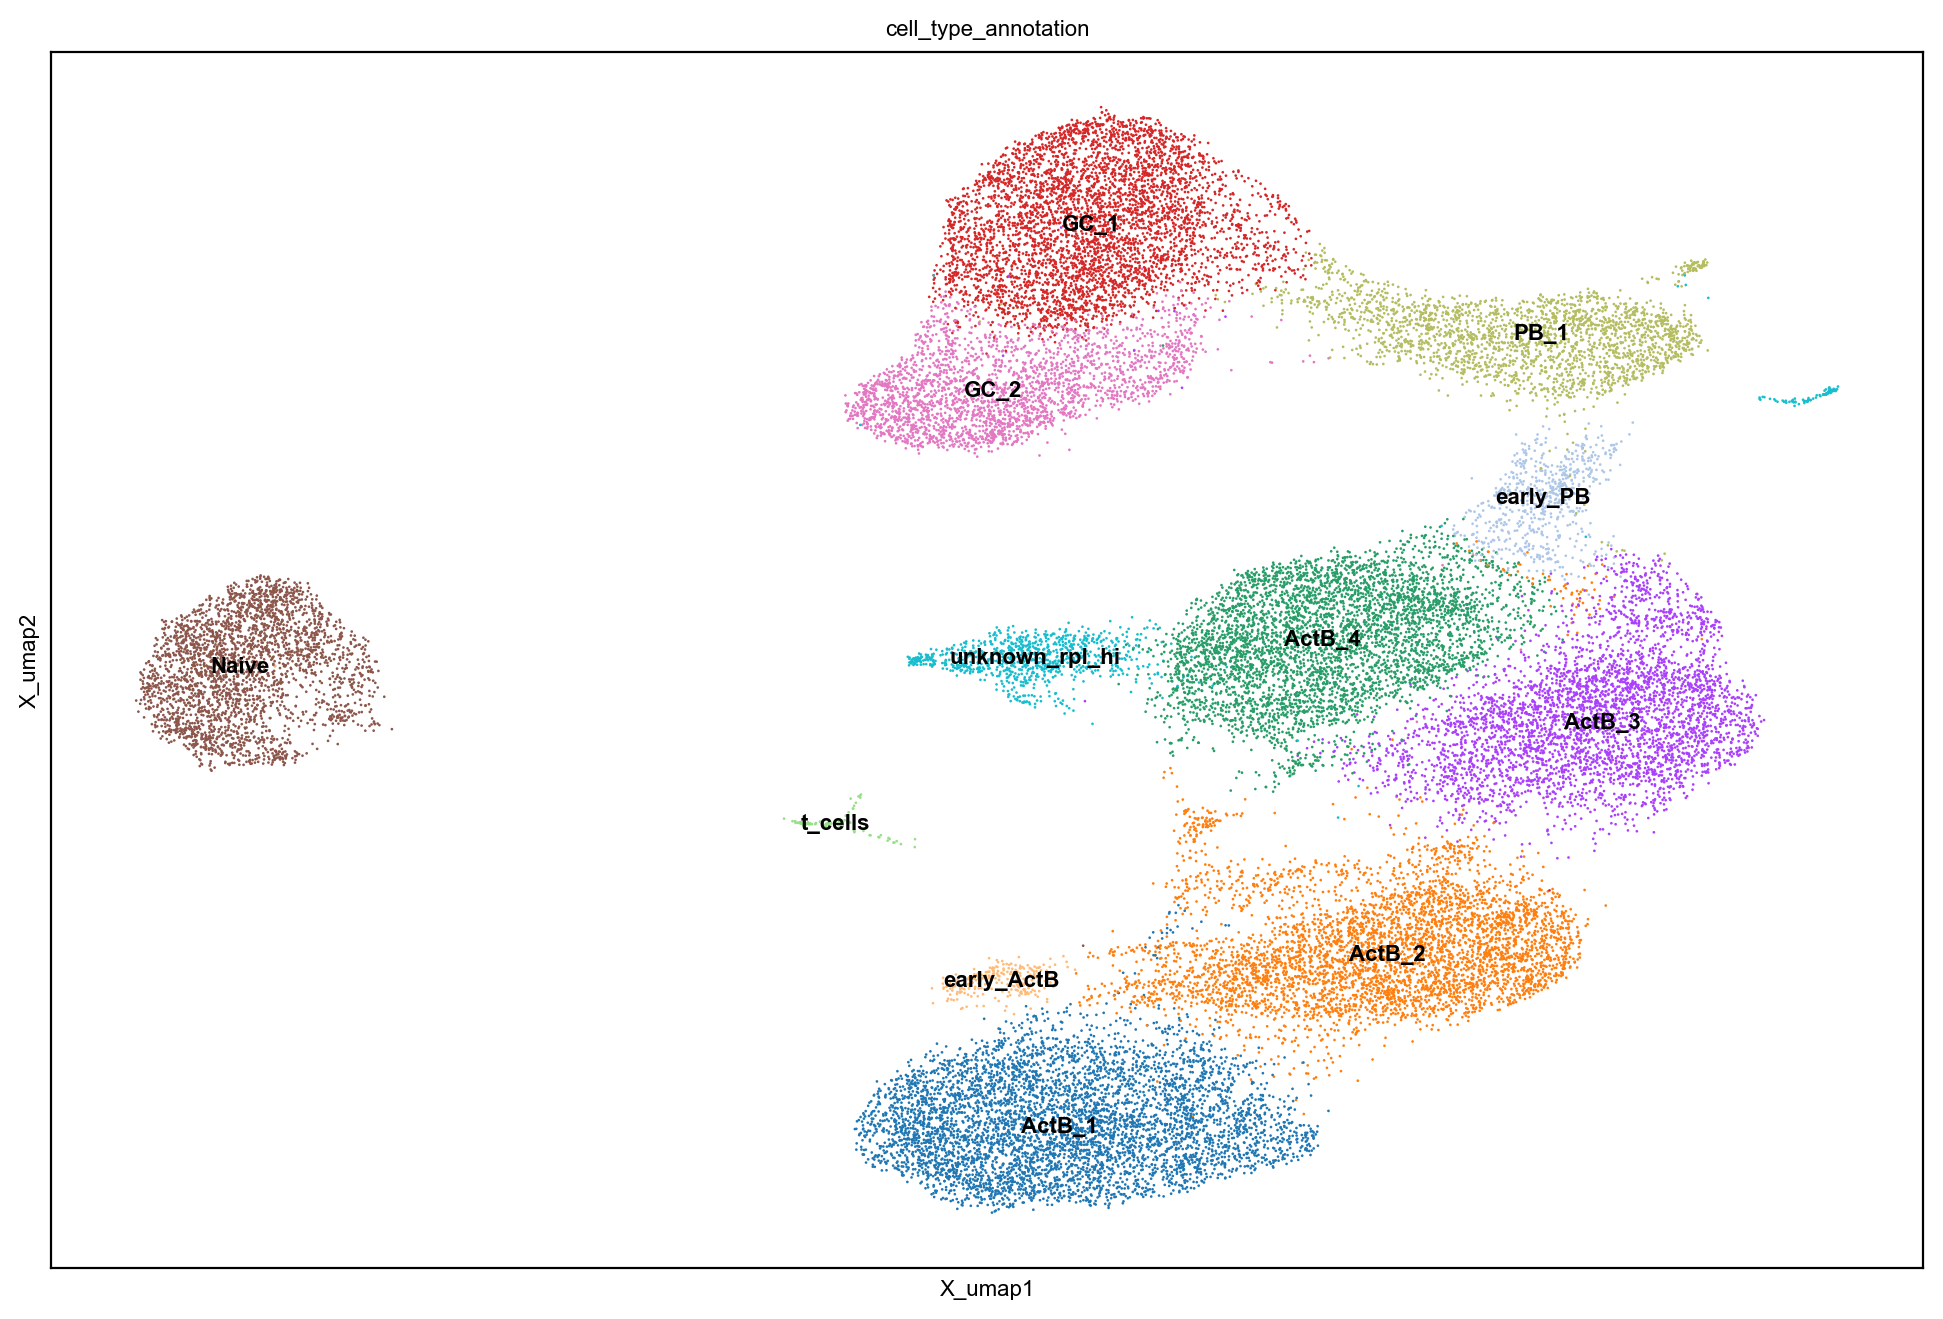

In [14]:

e = 'X_umap'
cellpop_field = 'cell_type_annotation' # this can vary from example to example
sc.set_figure_params(dpi=100, fontsize=8, figsize=(12.0,8.0))
sc.pl.embedding(adata, basis=e, color=cellpop_field, legend_loc='on data')


In [15]:
file_metadata = requests.get("https://api.data.igvf.org/matrix-files/IGVFFI3541FUQE/").json()
uri = file_metadata['s3_uri']
parsed = urlparse(uri)

bucket_name = parsed.netloc
object_key = parsed.path.lstrip("/")

# Get the object from S3 - requires creds
response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the content of the object into a BytesIO stream
data_stream = io.BytesIO(response['Body'].read())

adata = sc.read_h5ad(data_stream)
adata

AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'sample', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index', 'leiden', 'cell_type_annotation', 'leiden_filtered_cells'
    var: 'peak_ids', 'feature_types', 'genome', 'chr', 'start', 'end'
    uns: 'TSS_metadata', 'distance_to_TSS_genes', 'leiden_colors', 'sample_colors', 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'distance_to_TSS', 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

Here we see the 'varm' object (Variable multi-dimensional annotations)

In [16]:
adata.varm

AxisArrays with keys: distance_to_TSS, topic_feature_activations, topic_feature_compositions